In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dir = r"C:\Users\Funmilayo\Documents\combined_images"

In [3]:
class_count = {}

In [4]:
if not os.path.exists(data_dir):
    print(f"ERROR: The path '{data_dir}' does not exist. Check your spelling!")
else:
    class_counts = {}

In [5]:
for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count

In [6]:
if not class_counts:
    print("The folder was found, but it was empty or had no subfolders.")
else:
    print("Success! Here is your distribution:")
    print(class_counts)

Success! Here is your distribution:
{'MildDemented': 10000, 'ModerateDemented': 10000, 'NonDemented': 12800, 'VeryMildDemented': 11200}


In [7]:
import pandas as pd

df = pd.DataFrame(list(class_counts.items()), columns=['Stage', 'Image_Count'])

df['Percentage (%)'] = (df['Image_Count'] / df['Image_Count'].sum() * 100).round(2)

df = df.sort_values(by='Image_Count', ascending=False)

print(df)

              Stage  Image_Count  Percentage (%)
2       NonDemented        12800           29.09
3  VeryMildDemented        11200           25.45
1  ModerateDemented        10000           22.73
0      MildDemented        10000           22.73


C:\Users\Funmilayo\AppData\Local\Temp\ipykernel_13244\2155462609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df, x='Stage', y='Image_Count', palette='magma')


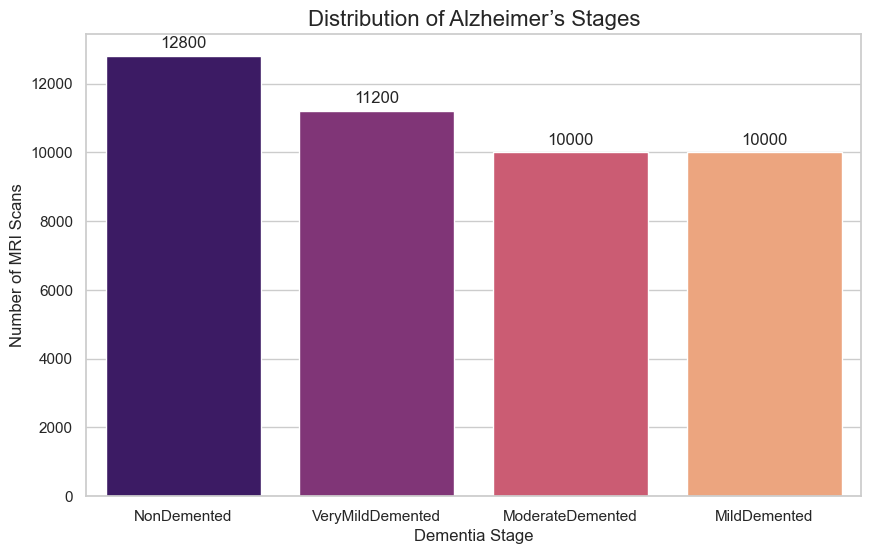

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
plot = sns.barplot(data=df, x='Stage', y='Image_Count', palette='magma')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.title('Distribution of Alzheimer’s Stages', fontsize=16)
plt.ylabel('Number of MRI Scans')
plt.xlabel('Dementia Stage')
plt.show()

In [9]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [10]:
import matplotlib.pyplot as plt
import cv2

In [11]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

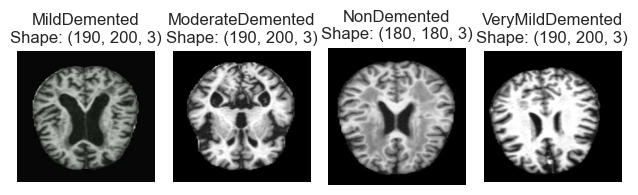

In [12]:
for i, class_name in enumerate(class_counts.keys()):
    class_path = os.path.join(data_dir, class_name)
    
    files = os.listdir(class_path)
    
    images = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    if len(images) > 0:
        first_image_path = os.path.join(class_path, images[0])
        
        img = cv2.imread(first_image_path)
        
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            
            plt.subplot(1, 4, i + 1)
            plt.imshow(img)
            plt.title(f"{class_name}\nShape: {img.shape}")
            plt.axis('off')
        else:
            print(f"Could not read image at: {first_image_path}")
    else:
        print(f"No images found in folder: {class_path}")

plt.tight_layout()
plt.show()

In [13]:
import numpy as np

stats_list = []

for class_name in class_counts.keys():
    class_path = os.path.join(data_dir, class_name)
    images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    sample_size = min(50, len(images))
    
    means = []
    stds = []
    
    for i in range(sample_size):
        img_path = os.path.join(class_path, images[i])
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is not None:
            means.append(np.mean(img))
            stds.append(np.std(img))
            
    stats_list.append({
        'Stage': class_name,
        'Avg_Brightness': np.mean(means),
        'Avg_Contrast': np.mean(stds)
    })

stats_df = pd.DataFrame(stats_list)
print(stats_df)

              Stage  Avg_Brightness  Avg_Contrast
0      MildDemented       74.044948     76.653401
1  ModerateDemented       73.641659     77.077893
2       NonDemented       79.000547     80.042557
3  VeryMildDemented       76.837085     78.325767


In [14]:
def preprocess_image(image_path, target_size=(128, 128)):
    
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    img_resized = cv2.resize(img, target_size)
    
    img_final = img_resized / 255.0
    
    return img_final

sample_path = os.path.join(data_dir, list(class_counts.keys())[0], os.listdir(os.path.join(data_dir, list(class_counts.keys())[0]))[0])
processed_img = preprocess_image(sample_path)

print(f"Original shape: {cv2.imread(sample_path).shape}")
print(f"New shape: {processed_img.shape}")
print(f"Max pixel value: {processed_img.max()}")

Original shape: (190, 200, 3)
New shape: (128, 128)
Max pixel value: 0.8274509803921568


In [15]:
import pandas as pd
import numpy as np

def get_texture(image):
    return np.std(image) 

class_name = list(class_counts.keys())[0] 
class_path = os.path.join(data_dir, class_name)
images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg'))][:50]

features = []
for img_name in images:
    img = cv2.imread(os.path.join(class_path, img_name), cv2.IMREAD_GRAYSCALE)
    features.append({
        'name': img_name,
        'brightness': np.mean(img),
        'texture': get_texture(img)
    })

feature_df = pd.DataFrame(features)
print("Statistical Properties (First 50 images):")
print(feature_df.describe())

Statistical Properties (First 50 images):
       brightness    texture
count   50.000000  50.000000
mean    74.044948  76.653401
std     19.734768  12.772742
min     33.455158  46.662376
25%     63.729704  67.501678
50%     73.840803  81.120099
75%     81.318488  85.772248
max    124.760947  95.972811


In [5]:
import os
import pandas as pd
import numpy as np
import cv2

data_dir = r"C:\Users\Funmilayo\Documents\combined_images"
data_rows = []

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                img = cv2.imread(os.path.join(class_path, img_name), cv2.IMREAD_GRAYSCALE)
                
                data_rows.append({
                    'Image_Name': img_name,
                    'Stage': class_name,
                    'Brightness': np.mean(img),
                    'Contrast': np.std(img),
                    'Is_Augmented': 'Yes' if 'aug' in img_name.lower() else 'No'
                })

df = pd.DataFrame(data_rows)
df.to_csv('mri_data.csv', index=False)
print("Done.")

Done.


In [7]:
import os
import pandas as pd
from datetime import datetime

data_rows = []

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            full_path = os.path.join(class_path, img_name)
            
            timestamp = os.path.getmtime(full_path)
            date_saved = datetime.fromtimestamp(timestamp)
            
            data_rows.append({
                'Image_Name': img_name,
                'Stage': class_name,
                'Date': date_saved,
                'Year': date_saved.year
            })

df = pd.DataFrame(data_rows)
df.to_csv('mri_time_data.csv', index=False)

In [10]:
import os
import cv2
import pandas as pd
import numpy as np

data_rows = []

for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    
    if os.path.isdir(class_path):
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        for img_name in images:
            img_path = os.path.join(class_path, img_name)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                height, width = img.shape
                avg_intensity = np.mean(img)
                std_intensity = np.std(img)
                
                is_augmented = 1 if "aug" in img_name.lower() else 0

                data_rows.append({
                    'Image_Name': img_name,
                    'Stage': class_name,
                    'Width': width,
                    'Height': height,
                    'Dimension_String': f"{width}x{height}",
                    'Avg_Intensity': round(avg_intensity, 2),
                    'Std_Intensity': round(std_intensity, 2),
                    'Is_Augmented': is_augmented
                })

df = pd.DataFrame(data_rows)
df.to_csv('alzheimers_bi_data.csv', index=False)

print(f"Done.' with {len(df)} rows.")
print(f"File saved at: {os.path.abspath('alzheimers_bi_data.csv')}")

Done.' with 44000 rows.
File saved at: C:\Users\Funmilayo\alzheimers_bi_data.csv
